In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('Expanded_data_with_more_features.csv')

In [14]:
df.head(3)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [16]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [24]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [31]:
df.head(1)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74


<h1>Drop unnamed column</h1>

In [53]:
df.drop('Unnamed: 0',axis=1,inplace=True).head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


<h1>Changing in weeky study hour columns</h1>

In [ ]:
df['WklyStudyHours']=df['WklyStudyHours'].str.replace('5 - 10','5 to 10')

<h1>Gender distribution in Graph</h1>

In [132]:
df['Gender'].fillna('unknown', inplace=True)

C:\Users\hamma\AppData\Local\Temp\ipykernel_10096\771757039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Gender', palette='pastel')


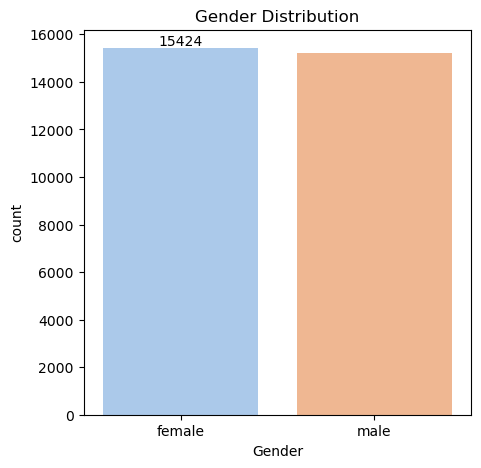

In [176]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df, x='Gender', palette='pastel')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()


<h1>Gender distribution in Numbers</h1>

In [100]:
df["Gender"].value_counts()

Gender
female    15424
male      15217
Name: count, dtype: int64

In [152]:
gb=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


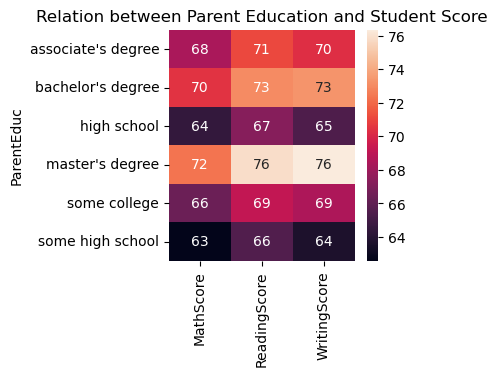

In [178]:
plt.figure(figsize=(3,3))
sns.heatmap(gb,annot=True)
plt.title('Relation between Parent Education and Student Score')
plt.show()

In [ ]:
# from the above chart we have concluded that there is hight impact on student perfomane on the basis of ParentsEducation

In [148]:
df.head(1)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,5 to 10,71,71,74


In [162]:
gp=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gp

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


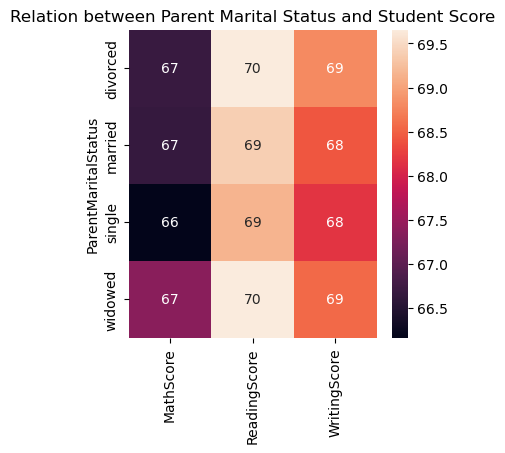

In [180]:
plt.figure(figsize=(4,4))
sns.heatmap(gp,annot=True)
plt.title('Relation between Parent Marital Status and Student Score')

plt.show()

In [ ]:
# from the above chart we have concluded that there is no/negligible impact on student perfomane on the basis of ParentMaritaStatus

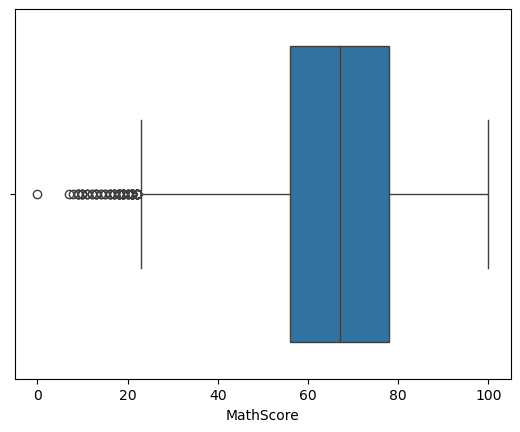

In [182]:
sns.boxplot(data=df,x='MathScore')
plt.show()

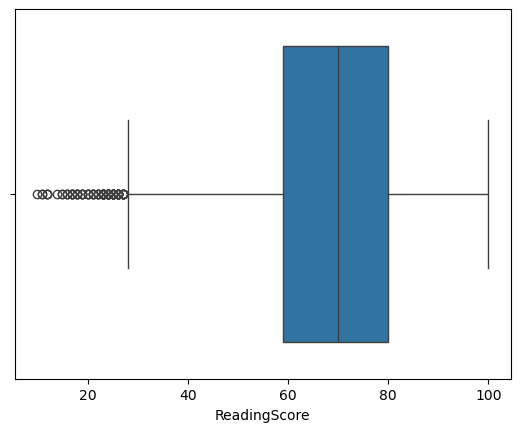

In [186]:
sns.boxplot(data=df,x='ReadingScore')
plt.show()

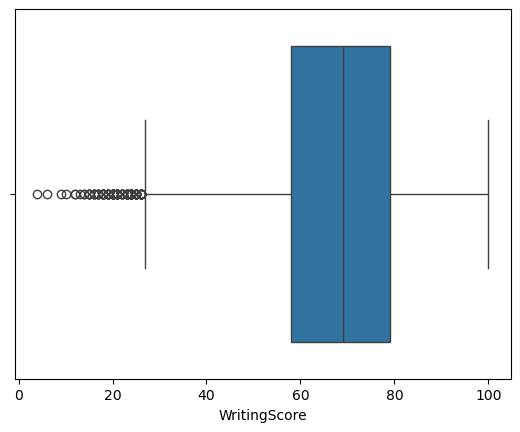

In [188]:
sns.boxplot(data=df,x='WritingScore')
plt.show()

In [196]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

<h1>Ethnic Group distribution</h1>

[2219, 5826, 9212, 4041, 7503]


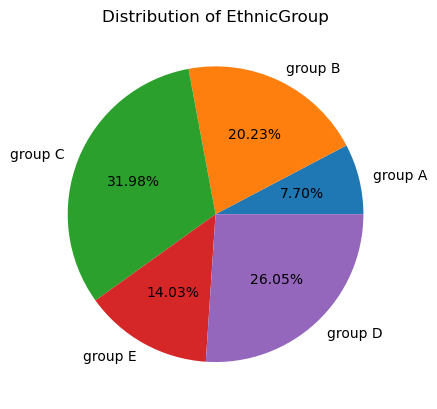

In [259]:
ga=df.loc[(df['EthnicGroup'] == 'group A')].count()
g_b=df.loc[(df['EthnicGroup'] == 'group B')].count()
gc=df.loc[(df['EthnicGroup'] == 'group C')].count()
ge=df.loc[(df['EthnicGroup'] == 'group E')].count()
gd=df.loc[(df['EthnicGroup'] == 'group D')].count()
l=['group A','group B','group C','group E','group D']
mylist = [
    ga['EthnicGroup'], 
    g_b['EthnicGroup'], 
    gc['EthnicGroup'], 
    ge['EthnicGroup'], 
    gd['EthnicGroup']
]
print(mylist)
plt.pie(mylist,labels=l,autopct='%1.2f%%')
plt.title('Distribution of EthnicGroup')
plt.show()

[Text(0, 0, '15424')]

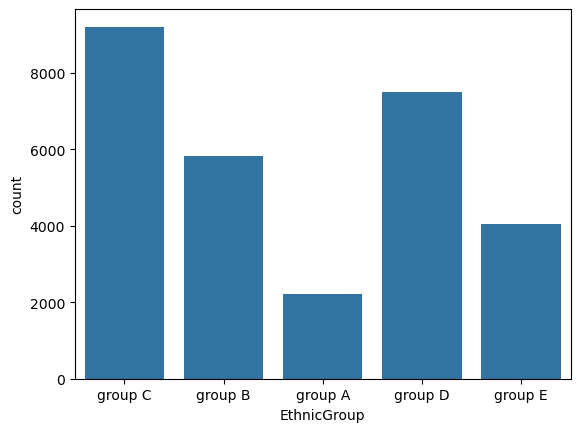

In [255]:
axe=sns.countplot(data=df ,x='EthnicGroup')
axe.bar_label(ax.containers[0])
                 
                 